In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.core import Engine
from src.agents import ETFTrader, FundamentalTrader, TrendTrader, MeanReversionTrader, ZeroIntelligenceTrader

In [59]:
initial_price = 100

agents = (
    [ZeroIntelligenceTrader(cash=500, stocks=0, noise=0.5) for i in range(10)]
    + [TrendTrader(cash=1000 * w, stocks=0, window_size=w) for w in [10, 15, 20, 30, 40, 50]]
    + [MeanReversionTrader(cash=1000 * w, stocks=0, window_size=w) for w in [3, 4, 5, 7, 10]]
    + [
        FundamentalTrader(cash=1_000_000, stocks=0, pi=1e-3, gdp=1e-3, price0=initial_price, pct=0.01),
        ETFTrader(cash=2_000_000, stocks=0, pct=0.01),
    ]
)

In [60]:
eng = Engine()

In [58]:
eng.run(
    agents=agents,
    initial_price=initial_price,
    n_steps=100,
)

g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g
g


In [49]:
eng.stats_monitor.balance_stats[-1]

defaultdict(collections.Counter,
            {src.agents.zero_intelligence.ZeroIntelligenceTrader: Counter({'total_cash': 1.78339465168676,
                      'total_stocks': 408162091.4636945,
                      'total_equity': 26.330596197907514,
                      'total_bankrupts': 0}),
             src.agents.technical.TrendTrader: Counter({'total_cash': 1996357.191562244,
                      'total_stocks': -569466080339.1188,
                      'total_equity': 1962109.0363803362,
                      'total_bankrupts': 0}),
             src.agents.etf.ETFTrader: Counter({'total_cash': 1136615.6556307103,
                      'total_stocks': 568188630127.0625,
                      'total_equity': 1170786.98391351,
                      'total_bankrupts': 0}),
             src.agents.technical.MeanReversionTrader: Counter({'total_cash': 169.01285780205075,
                      'total_stocks': 869277147.4888811,
                      'total_equity': 221.2918954324

In [53]:
e = [b[ETFTrader]["total_equity"] for b in eng.stats_monitor.balance_stats]

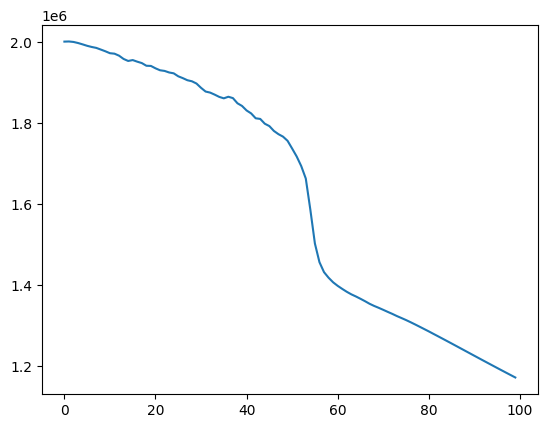

In [54]:
import matplotlib.pyplot as plt
plt.plot(e)

In [8]:
agents[0].is_bankrupt

False

In [9]:
agents[6].is_bankrupt

False

In [55]:
eng.stats_monitor.trade_stats[-2]

defaultdict(collections.Counter,
            {src.agents.fundamentalist.FundamentalTrader: Counter({'total_buy_transactions': 1,
                      'total_buy_transactions_quantity': 92.50264039655299,
                      'total_buy_transactions_cash': 2818.3736510327303,
                      'mean_buy_transaction_price': 30.468034630693136,
                      'median_buy_transaction_price': 30.468034630693136,
                      'mean_weighted_buy_transaction_price': 30.46803462739939}),
             src.agents.technical.TrendTrader: Counter({'total_sell_transactions': 517,
                      'total_sell_transactions_quantity': 142115121113.85345,
                      'total_sell_transactions_cash': 8546.919456035735,
                      'mean_sell_transaction_price': 0.05893240848353543,
                      'median_sell_transaction_price': 3.948446918886643e-08,
                      'mean_weighted_sell_transaction_price': 6.014081674805383e-08}),
             src